# Clasificación de Imágenes / MNIST / NN Densas

# 1 Carga de Datos

In [ ]:
# Importamos las librerías a utilizar

import sys
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage
import keras

from keras.datasets import mnist

In [ ]:
# Establecemos una semilla para numpy y tensorflow

semilla = 1000
np.random.seed(semilla)
tf.random.set_seed(semilla)

In [ ]:
# Dividimos los datos en entrenamiento, validación y prueba

from sklearn.model_selection import train_test_split

(X_train_valid, y_train_valid), (X_test, y_test) = mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, test_size=0.1, random_state=semilla, stratify=y_train_valid
)

print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_valid: {}".format(X_valid.shape))
print("y_valid: {}".format(y_valid.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train: (54000, 28, 28)
y_train: (54000,)
X_valid: (6000, 28, 28)
y_valid: (6000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
# Visualizamos las imagenes de MNIST

def show_images(images, gray=True):
  fig=plt.figure(figsize=(8,8))
  index = np.random.randint(len(images), size=100)
  for i in range(100):
    fig.add_subplot(10, 10, i+1)
    plt.axis('off')
    if gray:
      color = 'gray'
    else:
      color = None
    plt.imshow(images[index[i]], cmap=color)
  plt.show()

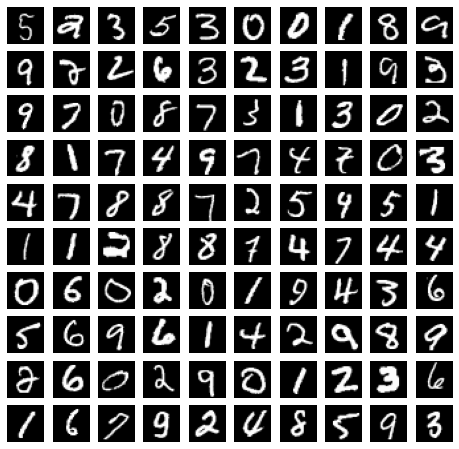

In [ ]:
show_images(X_train)

# 2 Preparación de los Datos

In [ ]:
# Reducimos los datos de 3 a 2 dimensiones, normalizamos y codificamos la variable de salida "y"

from keras.utils import np_utils

X_train = X_train.astype('float32')
X_train /= 255
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes=10)
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

X_valid = X_valid.astype('float32')
X_valid /= 255
X_valid = X_valid.reshape(X_valid.shape[0], -1)
y_valid = keras.utils.np_utils.to_categorical(y_valid, num_classes=10)
print("X_valid: {}".format(X_valid.shape))
print("y_valid: {}".format(y_valid.shape))

X_test = X_test.astype('float32')
X_test /= 255
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes=10)
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (54000, 784)
y_train: (54000, 10)
X_valid: (6000, 784)
y_valid: (6000, 10)
X_test: (10000, 784)
y_test: (10000, 10)


# 3 Modelado de la Red

In [ ]:
# Definimos el modelo

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu')) # 1a capa oculta
model.add(Dense(32, activation='relu')) # 2a capa oculta
model.add(Dense(10, activation='softmax')) # capa de salida con 10 clases

In [ ]:
# Entrenamos el modelo

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [ ]:
# Ajustamos el modelo

historial = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=128)

Epoch 1/20
422/422 [==============================] - 2s 3ms/step - loss: 1.7404 - acc: 0.4966 - val_loss: 1.0183 - val_acc: 0.7752
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.7043 - acc: 0.8311 - val_loss: 0.5411 - val_acc: 0.8615
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.4672 - acc: 0.8740 - val_loss: 0.4343 - val_acc: 0.8837
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3946 - acc: 0.8894 - val_loss: 0.3888 - val_acc: 0.8913
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3576 - acc: 0.8988 - val_loss: 0.3627 - val_acc: 0.8970
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3337 - acc: 0.9043 - val_loss: 0.3435 - val_acc: 0.9032
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3154 - acc: 0.9091 - val_loss: 0.3273 - val_acc: 0.9085
Epoch 8/20
422/422 [==============================] - 1s 2ms/step - loss: 0.

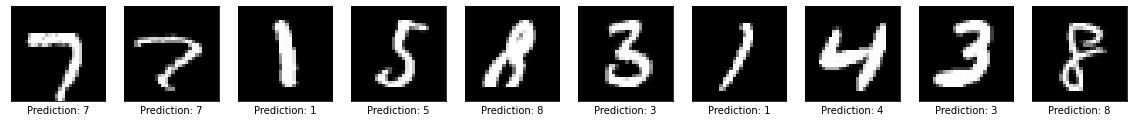

In [ ]:
# Realizamos las predicciones

y_pred = np.argmax(model.predict(X_test), axis=-1)

# Mostramos algunas predicciones

fig=plt.figure(figsize=(20,8))
index = np.random.randint(len(X_test), size=10)
for i in range(10):
  fig_i = fig.add_subplot(1, 10, i+1)
  fig_i.set_xticks(())
  fig_i.set_yticks(())
  fig_i.set_xlabel("Prediction: {}".format(y_pred[index[i]]))
  plt.imshow(X_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

# 4 Evaluación el Modelo

In [ ]:
# Evaluamos el modelo

score = model.evaluate(X_test, y_test)
print("Loss: {}\nAccuracy: {}".format(score[0], score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.2123 - acc: 0.9373
Loss: 0.212320476770401
Accuracy: 0.9373000264167786


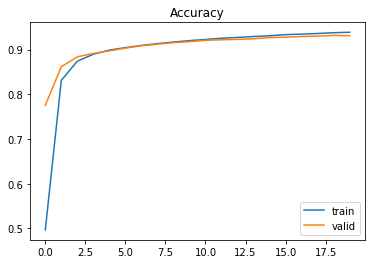

In [ ]:
# Graficamos la evolución del accuracy en el modelo

plt.plot(historial.history['acc'])
plt.plot(historial.history['val_acc'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()